In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_papers = dict()
cat = open("n_papers_2023.txt")
for line in cat:
    x = line.split()
    if x[0] not in n_papers:
        n_papers[x[0]] = dict()
    name = ""
    for i in range(1, len(x)-1):
        name += x[i]+" "
    n_papers[x[0]][name] = float(x[-1])
cat.close()

## Box Plot

Text(1, 25, '2023')

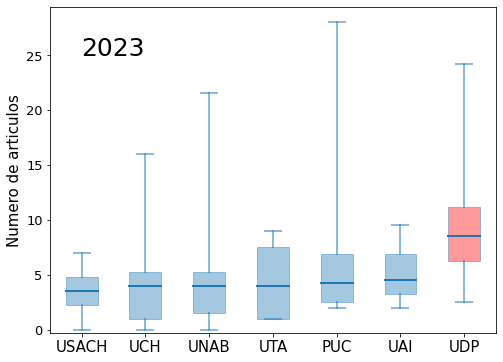

In [36]:
fig, ax = plt.subplots(1, figsize=(8,6))

color_use = [0.12156863, 0.46666667, 0.70588235, 0.3]

list_for_plots = list()
keys = list(n_papers.keys())
median_papers = dict()
for key in keys:
    median_papers[key] = np.median(list(n_papers[key].values()))
keys = sorted(keys, key=lambda k:median_papers[k])
for key in keys:
    list_for_plots.append(list(n_papers[key].values()))
bplot = ax.boxplot(list_for_plots, whis=5.0, labels=keys, whiskerprops={'color':color_use, 'alpha':0.5, "linewidth":2}, capprops={'color':color_use,'alpha':0.5,"linewidth":2}, medianprops={"linewidth":2,"color":color_use,"alpha":1.0},patch_artist=True, boxprops={"color":color_use, "alpha":0.5})
for bp in bplot['boxes'][:-1]:
    bp.set_facecolor(color_use)
    bp.set_alpha(0.4)
bplot['boxes'][-1].set_facecolor('red')
bplot['boxes'][-1].set_alpha(0.4)

ax.tick_params(axis='y', which='major', labelsize=13)
ax.tick_params(axis='x', which='major', labelsize=15)

ax.set_ylabel("Numero de articulos", fontsize=15)
ax.set_ylim([-0.3,ax.get_ylim()[1]])

ax.text(1,25,"2023",fontsize=25)

## Violin Plot

In [4]:
def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    #ax.set_xlabel('Sample name')

{'bodies': [<matplotlib.collections.PolyCollection object at 0x2aab4b658e50>, <matplotlib.collections.PolyCollection object at 0x2aab4b658dd0>, <matplotlib.collections.PolyCollection object at 0x2aab4b6685d0>, <matplotlib.collections.PolyCollection object at 0x2aab4b668850>, <matplotlib.collections.PolyCollection object at 0x2aab4b668bd0>, <matplotlib.collections.PolyCollection object at 0x2aab4b668fd0>, <matplotlib.collections.PolyCollection object at 0x2aab4b672490>], 'cmaxes': <matplotlib.collections.LineCollection object at 0x2aab4b658e10>, 'cmins': <matplotlib.collections.LineCollection object at 0x2aab4b672a90>, 'cbars': <matplotlib.collections.LineCollection object at 0x2aab4b672fd0>, 'cmedians': <matplotlib.collections.LineCollection object at 0x2aab4b672a50>}


Text(1, 25, '2023')

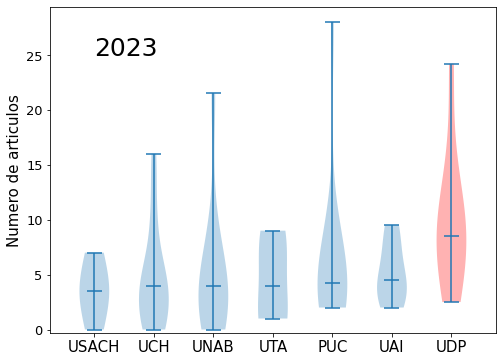

In [8]:
fig, ax = plt.subplots(1, figsize=(8,6))

list_for_plots = list()
keys = list(n_papers.keys())
median_papers = dict()
for key in keys:
    median_papers[key] = np.median(list(n_papers[key].values()))
    #print(key, median_papers[key])
keys = sorted(keys, key=lambda k:median_papers[k])
for key in keys:
    list_for_plots.append(list(n_papers[key].values()))

vp = ax.violinplot(list_for_plots, np.arange(1,len(keys)+1), showmedians=True)
print(vp)
vp['bodies'][-1].set_facecolor('red')

ax.tick_params(axis='y', which='major', labelsize=13)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.set_ylabel("Numero de articulos",fontsize=15)
ax.set_ylim([-0.3,ax.get_ylim()[1]])
set_axis_style(ax, keys)

ax.text(1,25,"2023",fontsize=25)